In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

archivo_csv = "MatrizTMXV.csv"
datos = pd.read_csv(archivo_csv)

print(datos)

        ID_CIDERH REGION   FECHA_RBE  TEMP_MIN_RBE     LAT_Y      LON_X
0      M_001_A_XV     XV  1996-01-01           7.6 -18.83571 -69.745881
1      M_001_A_XV     XV  1996-01-02           9.0 -18.83571 -69.745881
2      M_001_A_XV     XV  1996-01-03           7.8 -18.83571 -69.745881
3      M_001_A_XV     XV  1996-01-04           7.8 -18.83571 -69.745881
4      M_001_A_XV     XV  1996-01-05           8.4 -18.83571 -69.745881
...           ...    ...         ...           ...       ...        ...
56499    M_201_AA     XV  2010-07-18          14.2 -18.46700 -70.167000
56500    M_201_AA     XV  2010-08-12          14.5 -18.46700 -70.167000
56501    M_201_AA     XV  2010-08-15          12.0 -18.46700 -70.167000
56502    M_201_AA     XV  2010-08-27          14.2 -18.46700 -70.167000
56503    M_202_AA     XV  2006-05-27          18.1 -18.47000 -70.170000

[56504 rows x 6 columns]


In [2]:
df_original = pd.read_csv('MatrizTMXV.csv')

df_nuevo = pd.DataFrame()

for estacion in df_original['ID_CIDERH'].unique():
    df_estacion = df_original[df_original['ID_CIDERH'] == estacion]
    
    df_nuevo[estacion] = df_estacion['TEMP_MIN_RBE'].reset_index(drop=True)

df_nuevo.to_csv('VMTMXV.csv', index=False)

archivo_csv2 = "VMTMXV.csv"
datos2 = pd.read_csv(archivo_csv2)

print(datos2)

      M_001_A_XV  M_001_B_XV  M_006_A_XV  M_007_A_XV  M_009_A_XV  M_010_A_XV  \
0            7.6        17.0        -2.0         4.0         8.2        -8.0   
1            9.0        20.0        -5.0         5.0         8.5        -8.0   
2            7.8        20.4        -4.0        -1.0         8.7        -6.0   
3            7.8        18.0        -5.0        -1.5         9.9        -4.0   
4            8.4        20.3        -3.0         2.5        10.2        -8.0   
...          ...         ...         ...         ...         ...         ...   
5895         4.8        19.5         NaN         NaN         NaN         NaN   
5896         4.2        19.5         NaN         NaN         NaN         NaN   
5897         4.6        18.0         NaN         NaN         NaN         NaN   
5898         4.6        19.1         NaN         NaN         NaN         NaN   
5899        13.0        19.0         NaN         NaN         NaN         NaN   

      M_015_A_XV  M_020_A_XV  M_028_A_X

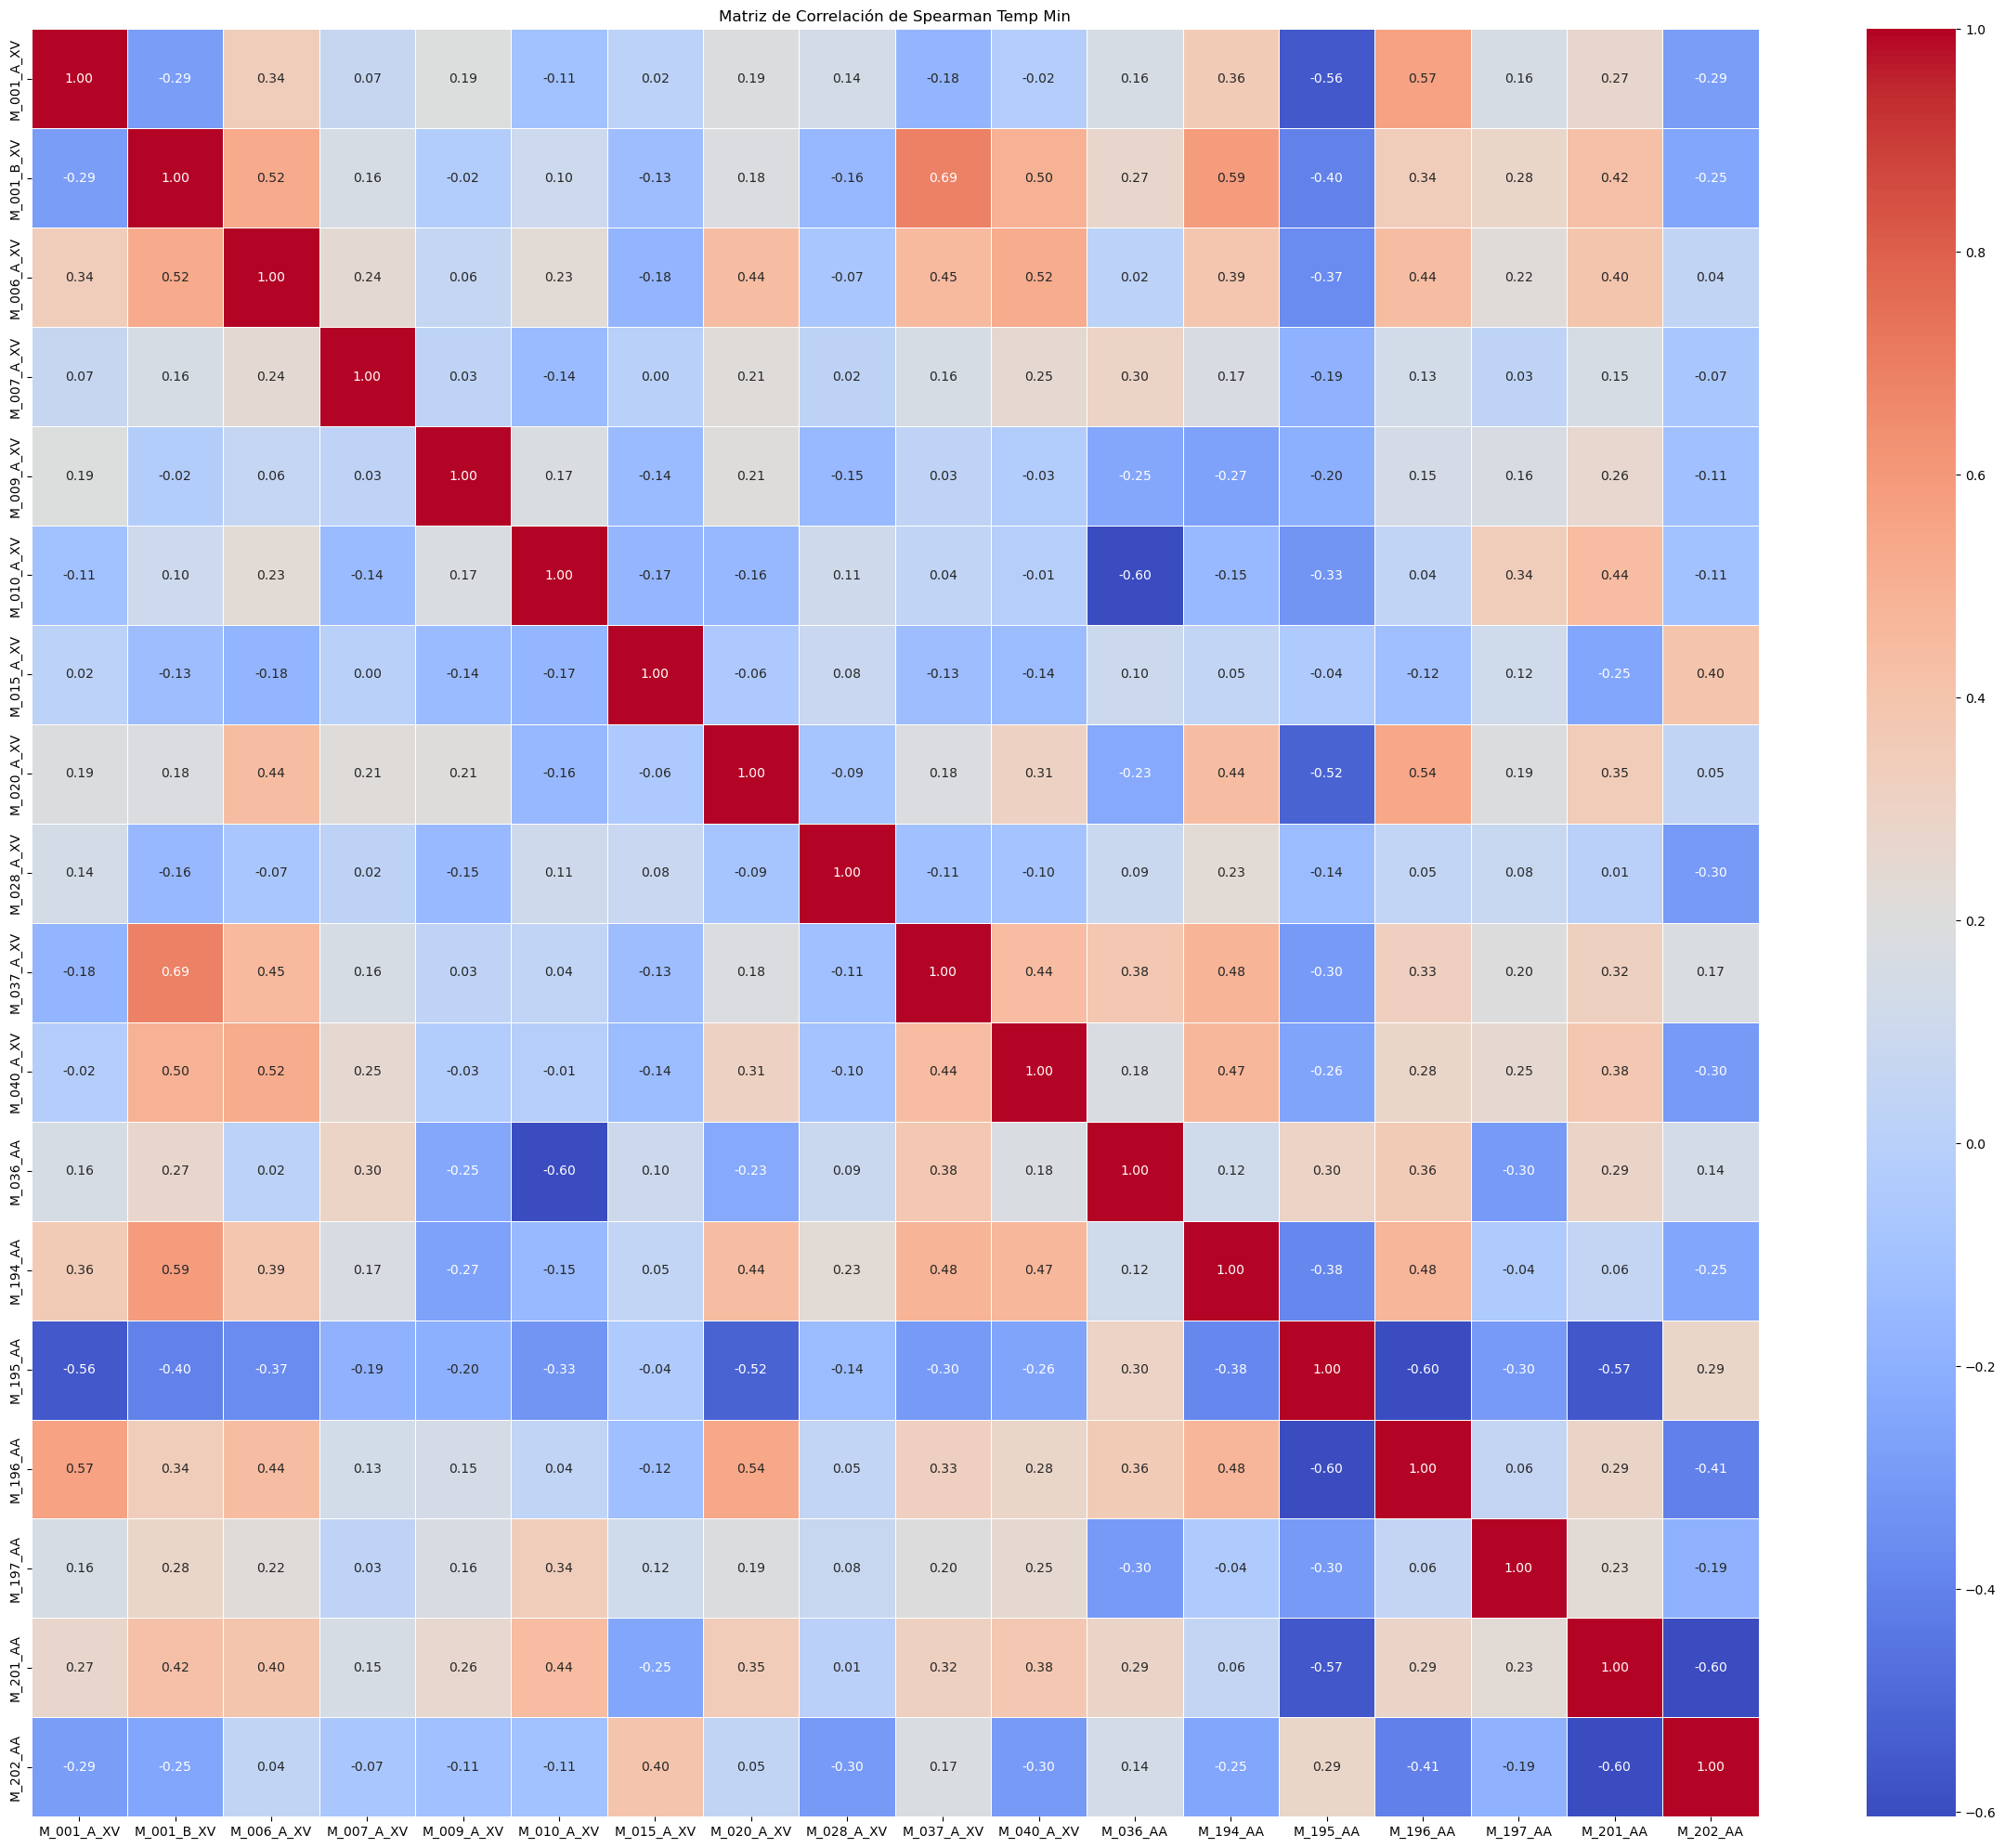

In [3]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Min")
plt.show()

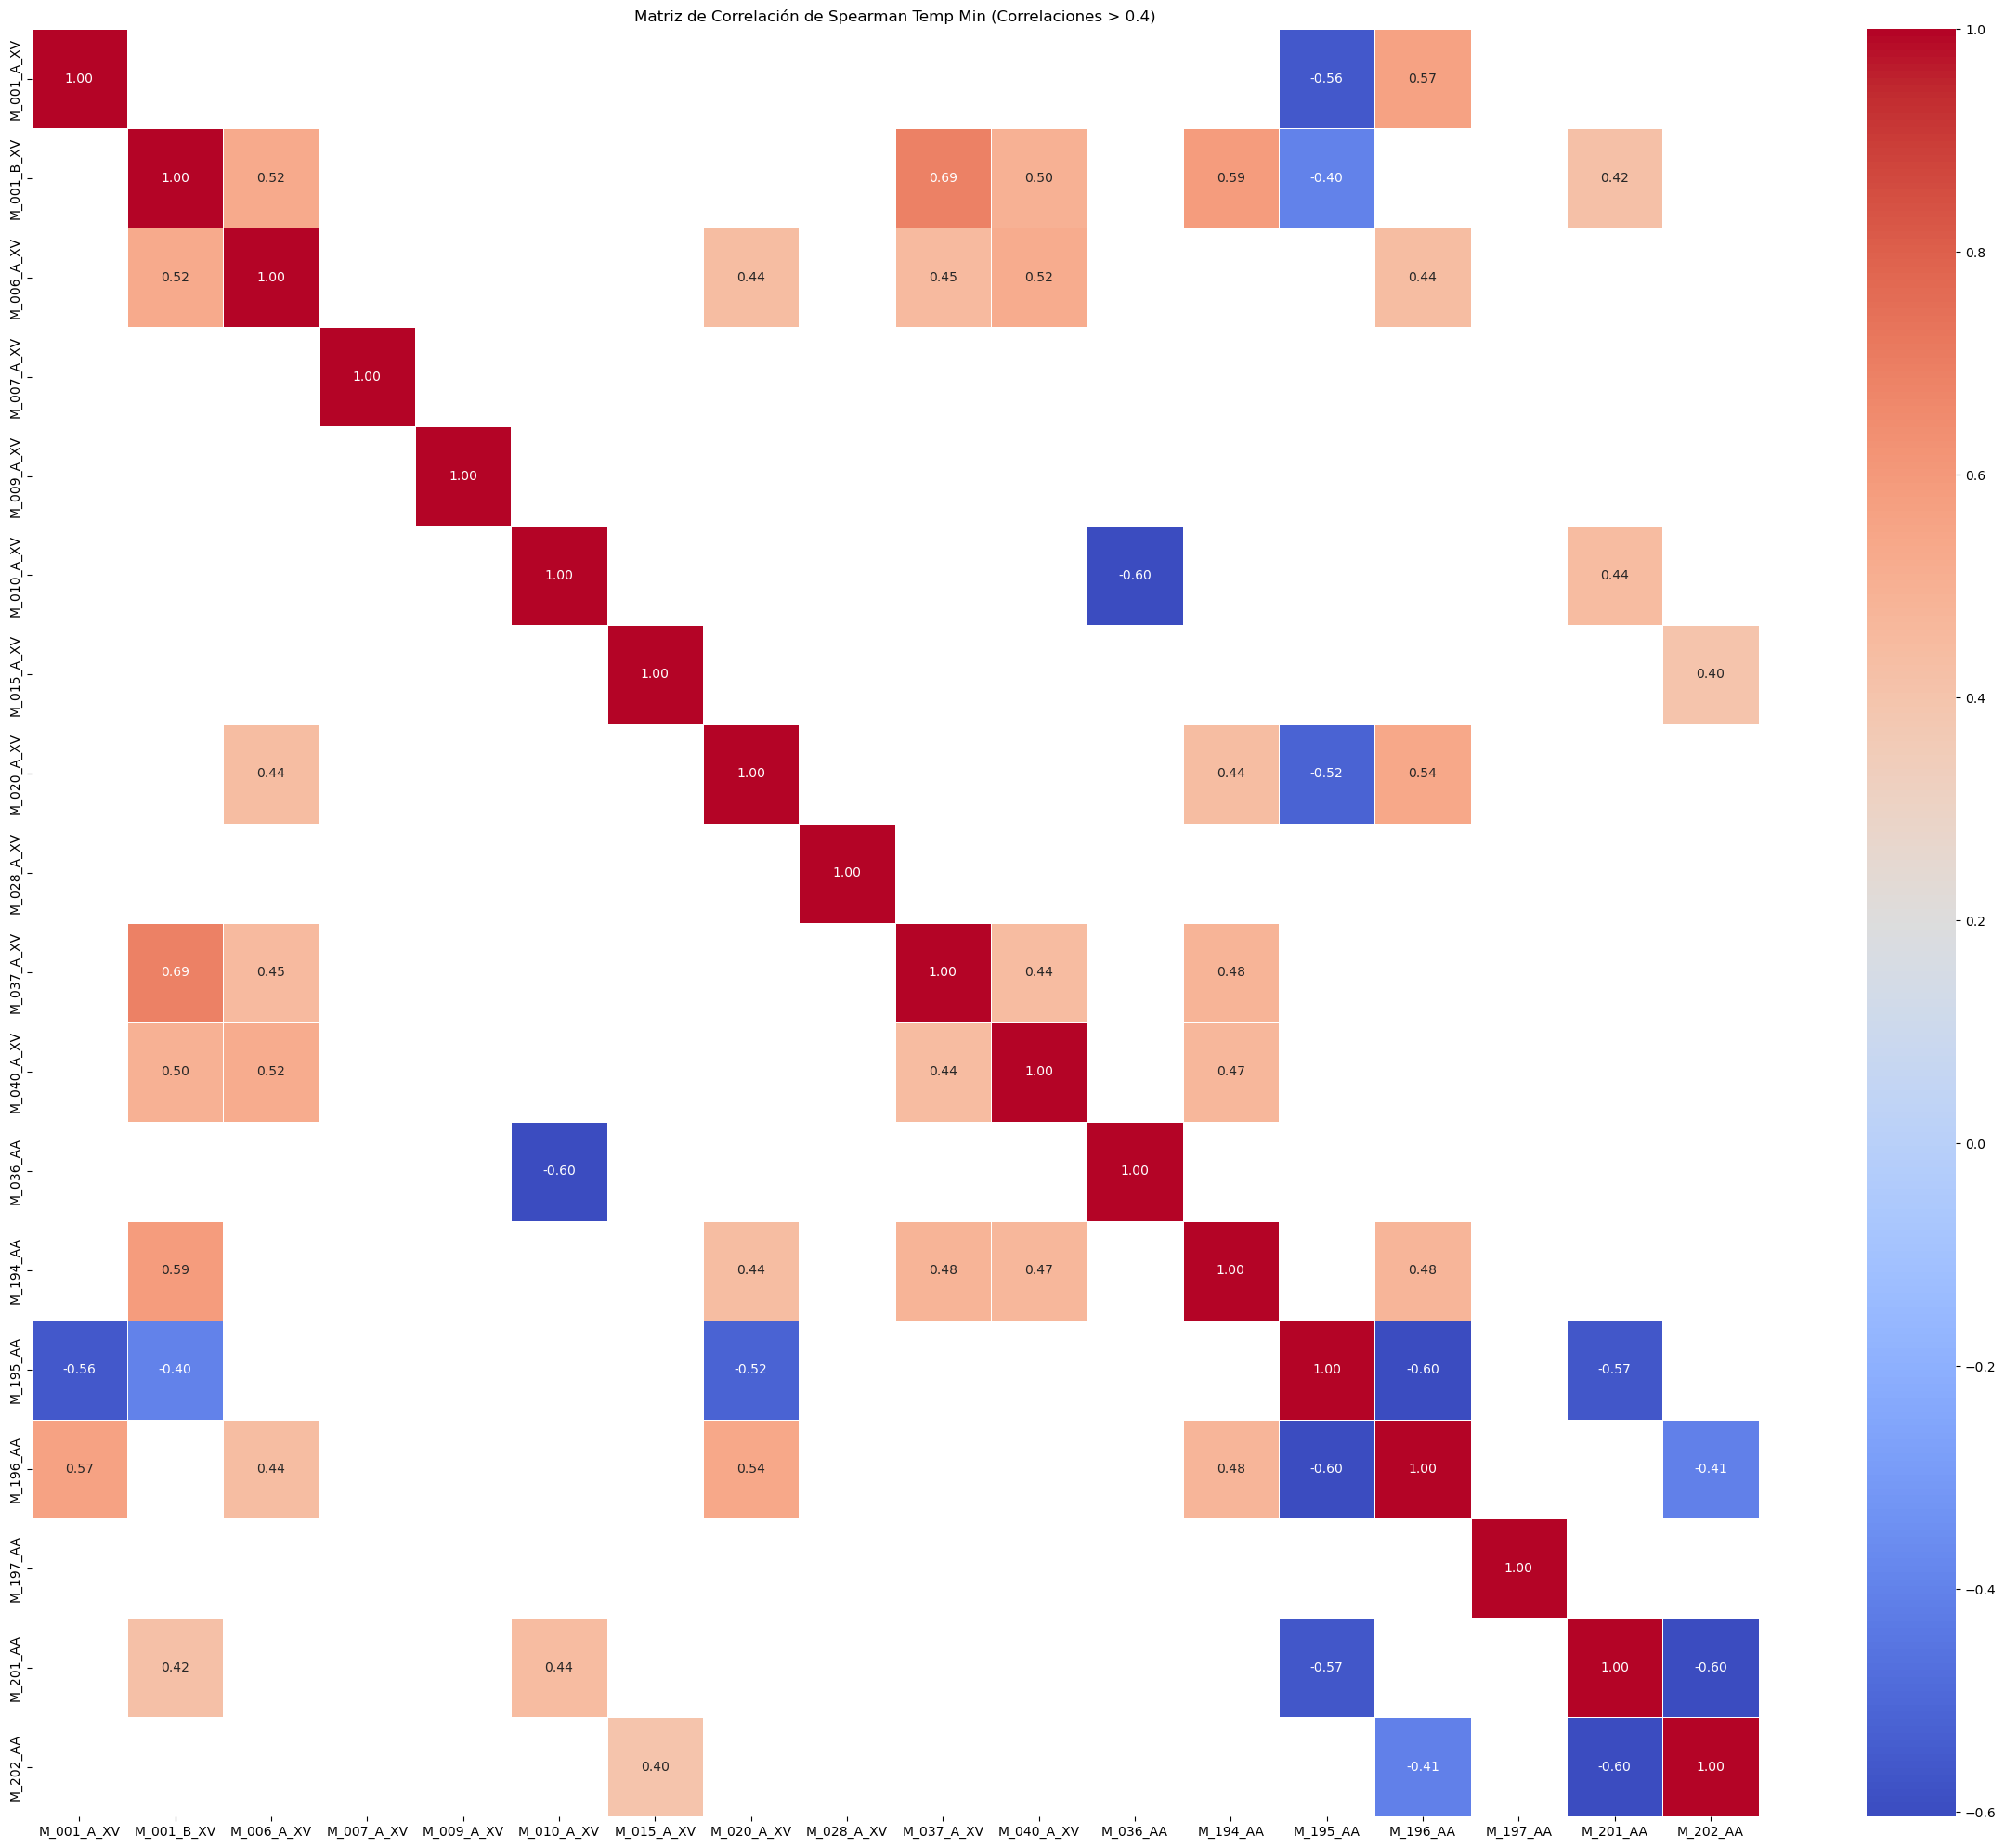

In [4]:
datos2.replace(-99.9, np.nan, inplace=True)

datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])
matriz_correlacion = datos_numericos.corr(method='spearman')

# Filtrar las correlaciones mayores a 0.4
matriz_filtrada = matriz_correlacion[matriz_correlacion.abs() > 0.4]

plt.figure(figsize=(30, 25))
sns.heatmap(matriz_filtrada, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Spearman Temp Min (Correlaciones > 0.4)")
plt.show()

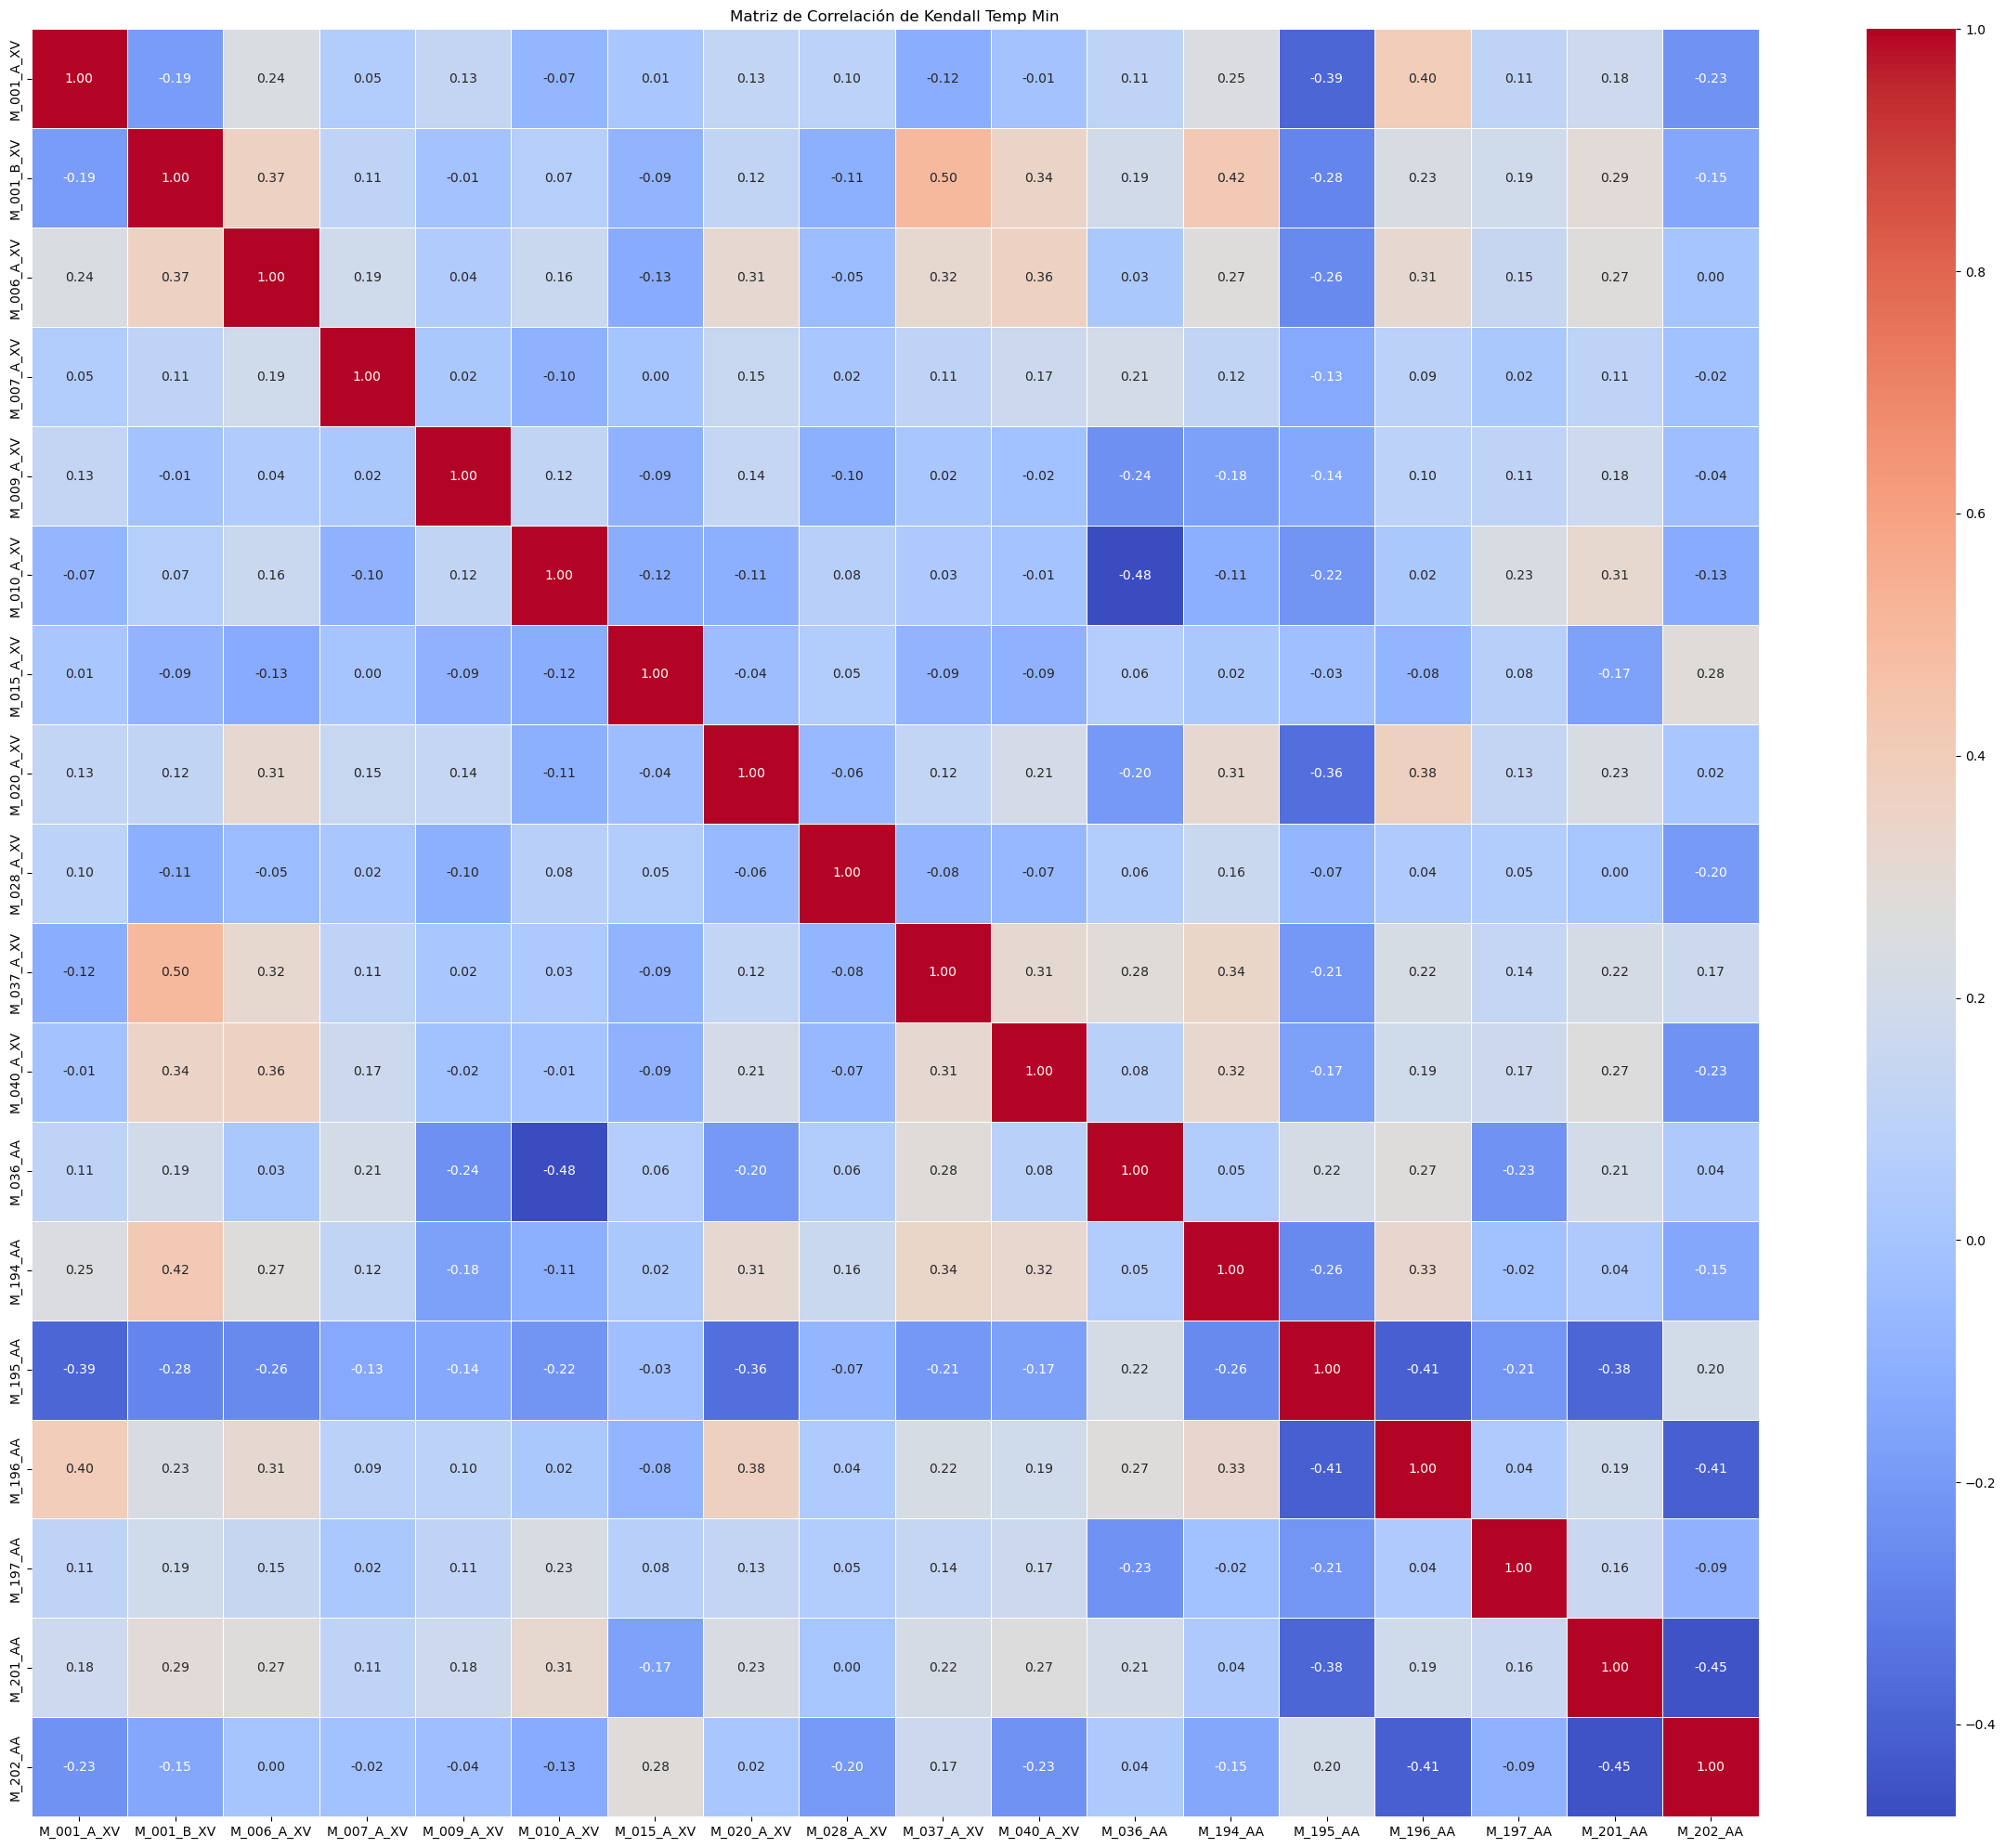

In [4]:
# Seleccionar solo las columnas numéricas
datos_numericos = datos2.select_dtypes(include=['float64', 'int64'])

# Calcular la matriz de correlación de Kendall
matriz_correlacion_kendall = datos_numericos.corr(method='kendall')

# Crear el heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(matriz_correlacion_kendall, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title("Matriz de Correlación de Kendall Temp Min")
plt.show()

In [2]:
import folium
import pandas as pd

# Lee el archivo CSV con las latitudes y longitudes
data = pd.read_csv('MatrizTMXV.csv', encoding='latin-1', low_memory=False)

# Crea un mapa centrado en una ubicación inicial
mapa = folium.Map(location=[data['LAT_Y'].mean(), data['LON_X'].mean()], zoom_start=10)

# Utiliza un conjunto para realizar un seguimiento de las estaciones ya agregadas
estaciones_agregadas = set()

# Añade marcadores para cada estación meteorológica usando 'ID_CIDERH'
for index, row in data.iterrows():
    # Verifica si la estación ya ha sido agregada
    if row['ID_CIDERH'] not in estaciones_agregadas:
        popup_text = f"ID_CIDERH: {row['ID_CIDERH']}"
        # Añade el marcador con el nombre de la estación
        folium.Marker([row['LAT_Y'], row['LON_X']], popup=popup_text).add_to(mapa)
        # Agrega la estación al conjunto
        estaciones_agregadas.add(row['ID_CIDERH'])

# Guarda el mapa como un archivo HTML
mapa.save('Mapa_Estaciones_XV.html')